In [38]:
import pandas as pd
import numpy as np

In [39]:
sp=pd.read_csv("C:/Users/harik/Downloads/List of Countries by Sugarcane Production.csv")
sp.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Exploratory Data Analysis

In [40]:
sp.shape

(103, 7)

## Data Cleaning

In [41]:
sp["Production (Tons)"]=sp["Production (Tons)"].str.replace(".","")
sp["Production per Person (Kg)"]=sp["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
sp["Acreage (Hectare)"]=sp["Acreage (Hectare)"].str.replace(".","")
sp["Yield (Kg / Hectare)"]=sp["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\harik\AppData\Local\Temp\ipykernel_35808\1107968204.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp["Production (Tons)"]=sp["Production (Tons)"].str.replace(".","")
C:\Users\harik\AppData\Local\Temp\ipykernel_35808\1107968204.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp["Production per Person (Kg)"]=sp["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\harik\AppData\Local\Temp\ipykernel_35808\1107968204.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp["Acreage 

In [42]:
sp.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [43]:
sp.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
sp.rename(columns={"Production per Person (Kg)":"Production_per_Person_(Kg)"},inplace=True)
sp.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
sp.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [44]:
sp.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [45]:
sp.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield(Kg/Hectare)             1
dtype: int64

In [46]:
sp=sp.dropna().reset_index()
sp.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [47]:
sp.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [48]:
#checking if columns are dropped
sp.isna().sum()

Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              0
Yield(Kg/Hectare)             0
dtype: int64

In [50]:
sp.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production_per_Person_(Kg)    object
Acreage(Hectare)              object
Yield(Kg/Hectare)             object
dtype: object

In [52]:
sp["Production(Tons)"]=sp["Production(Tons)"].astype(float)
sp["Production_per_Person_(Kg)"]=sp["Production_per_Person_(Kg)"].astype(float)
sp["Acreage(Hectare)"]=sp["Acreage(Hectare)"].astype(float)
sp["Yield(Kg/Hectare)"]=sp["Yield(Kg/Hectare)"].astype(float)

In [55]:
sp.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production_per_Person_(Kg)    float64
Acreage(Hectare)              float64
Yield(Kg/Hectare)             float64
dtype: object

In [57]:
sp.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production_per_Person_(Kg)    101
Acreage(Hectare)              101
Yield(Kg/Hectare)             102
dtype: int64

In [58]:
sp["Continent"].unique()

array(['South America', 'Asia', 'North America', 'Oceania', 'Africa',
       'Europe'], dtype=object)

## Data Exploration

## Univariate Analysis

In [59]:
sp.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [ ]:
#how many countries are producing sugarcanes from each continent

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

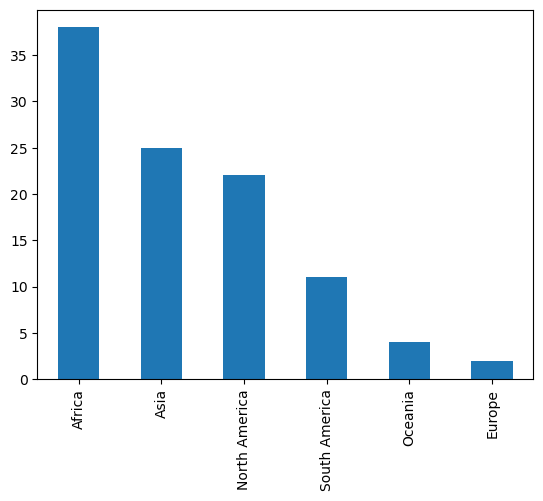

In [75]:
sp["Continent"].value_counts().plot(kind="bar")

<Axes: >

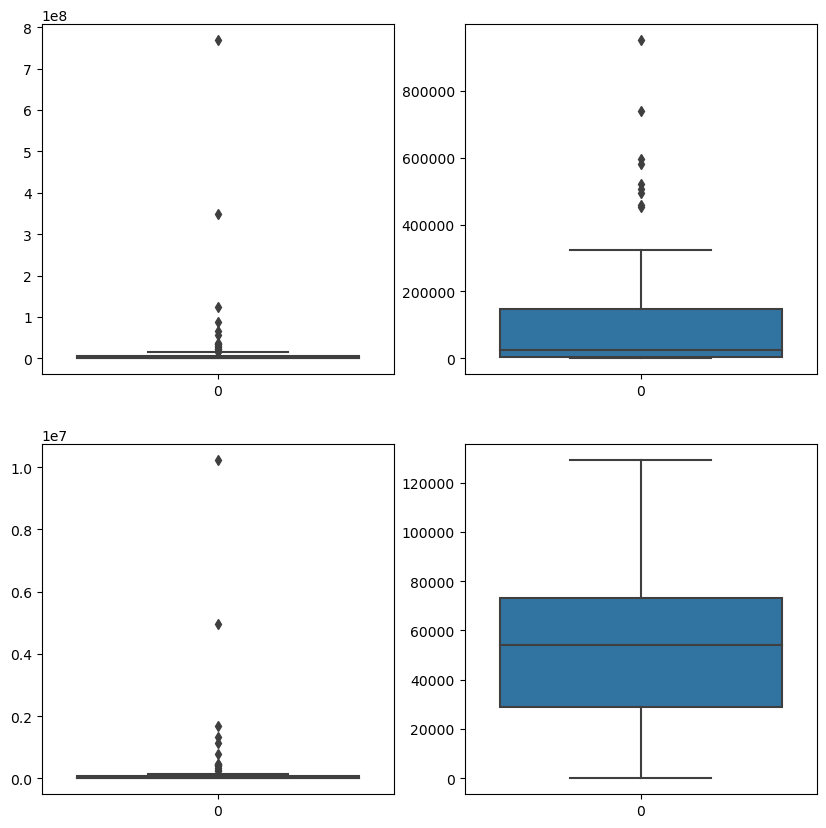

In [85]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(sp["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(sp["Production_per_Person_(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(sp["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(sp["Yield(Kg/Hectare)"])

In [86]:
sp.describe()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


#Here the data distribution seems to be unusual because of presence of higher values but i dont think these observations are outliers because their are few countries which have highest production rate than average and main crop production might be sugarcane and those may be few scenarious where we need to take into consideration and this kind of analysis doesnot require working on outliers according to me and the values may be correct

## Bivariate Analysis

In [90]:
sp_new=sp[["Country","Production(Tons)"]].set_index("Country")
sp_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [93]:
sp_new["Production(Tons)_Percentage"]=sp_new["Production(Tons)"]*100/sp_new["Production(Tons)"].sum()
sp_new

,Production(Tons),Production(Tons)_Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_Percentage'>

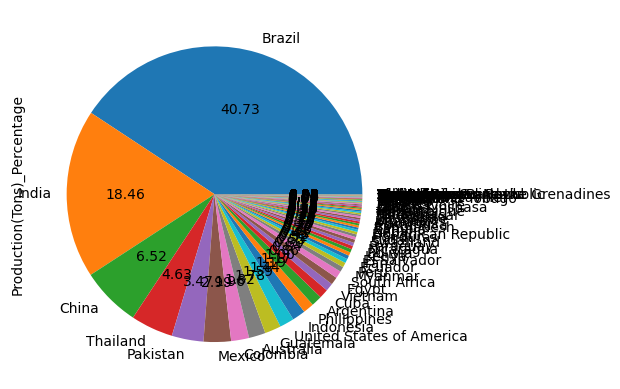

In [95]:
sp_new["Production(Tons)_Percentage"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

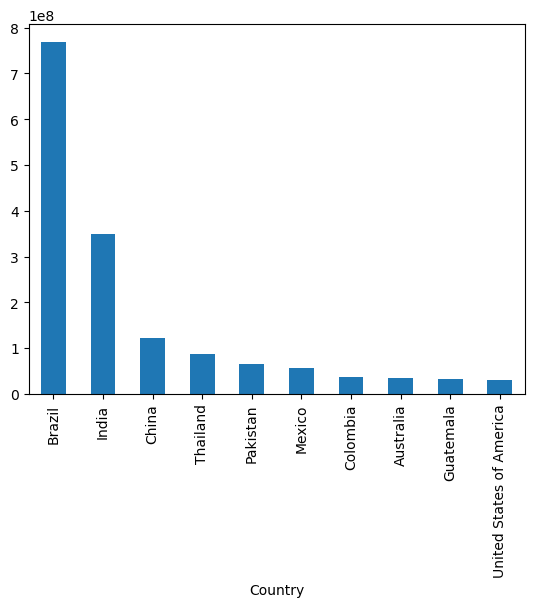

In [98]:
sp_new["Production(Tons)"].head(10).plot(kind="bar")

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

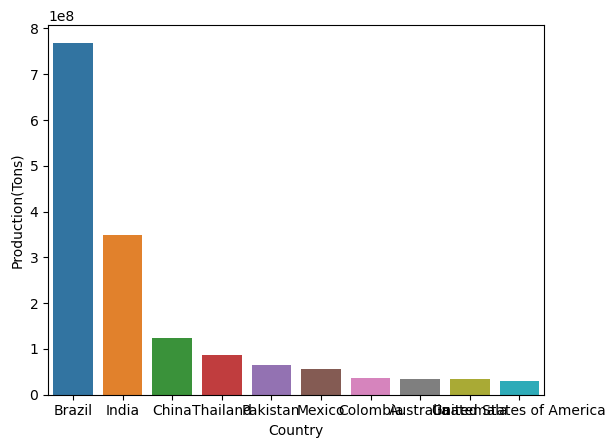

In [110]:
sp_prod=sp.sort_values("Production(Tons)",ascending=False)
ax=sns.barplot(data=sp_prod.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels())

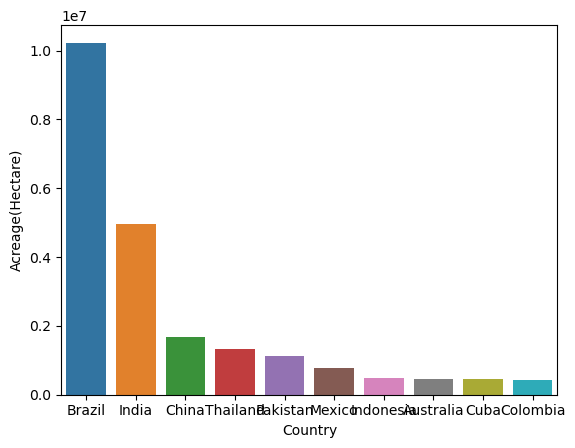

In [108]:
sp_acr=sp.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=sp_acr.head(10),x="Country",y="Acreage(Hectare)")

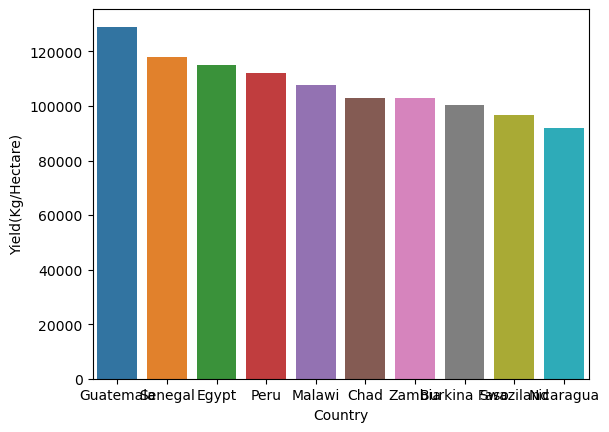

In [111]:
sp_yie=sp.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=sp_yie.head(10),x="Country",y="Yield(Kg/Hectare)")

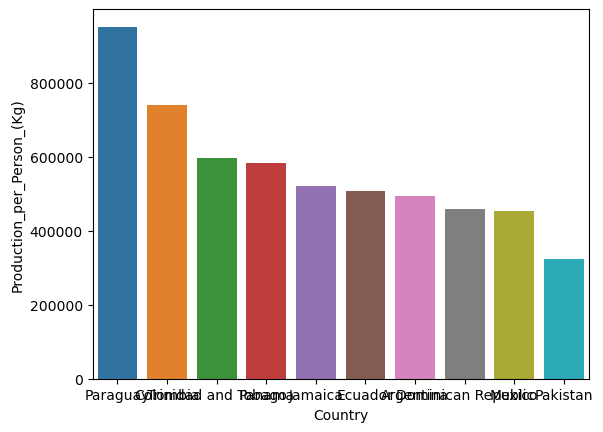

In [114]:
sp_pro=sp.sort_values("Production_per_Person_(Kg)",ascending=False).head(10)
ax=sns.barplot(data=sp_pro,x="Country",y="Production_per_Person_(Kg)")

In [117]:
sp.corr()

C:\Users\harik\AppData\Local\Temp\ipykernel_35808\1788210350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sp.corr()


,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person_(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


In [121]:
sp.columns

Index(['Country', 'Continent', 'Production(Tons)',
       'Production_per_Person_(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

C:\Users\harik\AppData\Local\Temp\ipykernel_35808\233376071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sp.corr(),annot=True,cmap="Greens")


<Axes: >

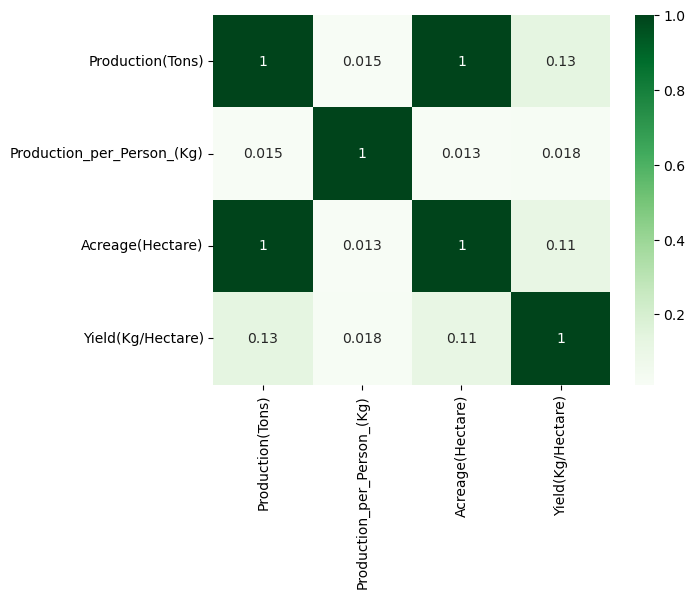

In [126]:
sns.heatmap(sp.corr(),annot=True,cmap="Greens")

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

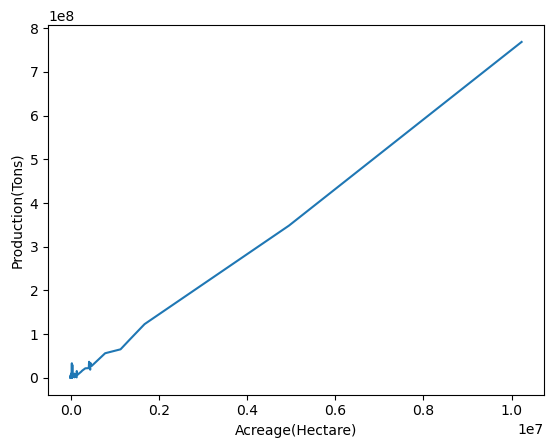

In [129]:
sns.lineplot(data=sp,x="Acreage(Hectare)",y="Production(Tons)")

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

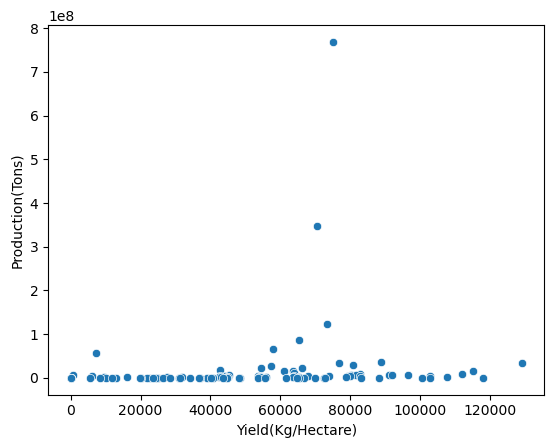

In [131]:
sns.scatterplot(data=sp,x="Yield(Kg/Hectare)",y="Production(Tons)")

In [133]:
sp_continent=sp.groupby('Continent').sum()
sp_continent

C:\Users\harik\AppData\Local\Temp\ipykernel_35808\2018612005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sp_continent=sp.groupby('Continent').sum()


,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


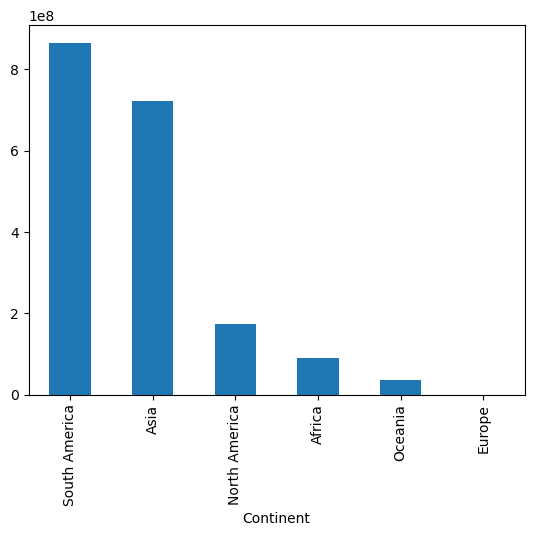

In [138]:
sp_continent["Production(Tons)"].sort_values(ascending=False).plot(kind='bar')
sp_continent

In [139]:
sp["Continent"].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


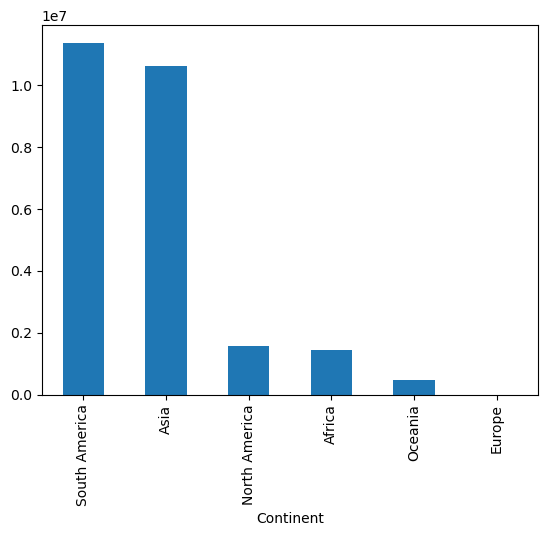

In [140]:
sp_continent["Acreage(Hectare)"].sort_values(ascending=False).plot(kind='bar')
sp_continent

In [148]:
sp_continent["number_of_countries"]=sp.groupby("Continent").count()["Country"]

In [149]:
sp_continent.head()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


<Axes: xlabel='number_of_countries', ylabel='Production(Tons)'>

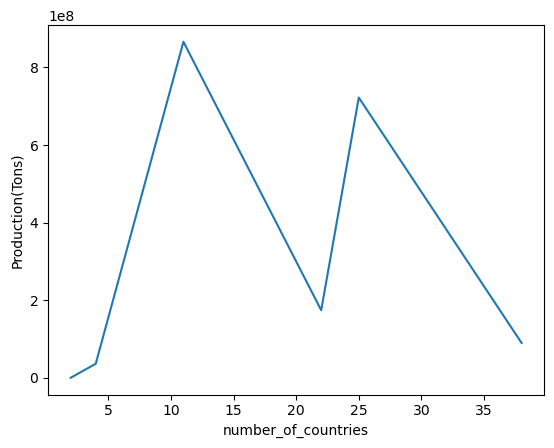

In [150]:
continent_names=sp_continent.index.to_list()
sns.lineplot(data=sp_continent,x="number_of_countries",y="Production(Tons)")

In [152]:
sp_continent.corr()

,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person_(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: ylabel='Production(Tons)'>

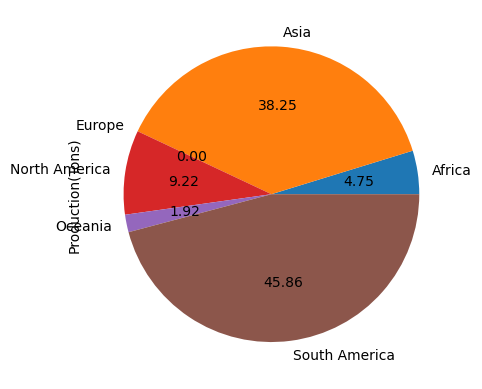

In [153]:
sp_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")